# Strip Plot

Welcome back to another lecture on visualizing *categorical data* with Seaborn! In the last lecture, we discussed in detail the importance of Categorical data and general representation. In this lecture, we shall continue from where we left previously. Our discussion has majorly been around beeswarm visualization using Seaborn's Swarmplot. Today, we are going to discuss another important type of plot, i.e. **Strip Plot**, which is pretty similar to what we have already seen previously. 

So, let us begin by importing our requisities, that we have gathered over time. Then, slowly we shall start exploring parameters and scenarios where this plot could come in handy for us:

In [14]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="whitegrid", palette="rocket")
import warnings
warnings.filterwarnings("ignore")

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

We have already observed **Strip Plot** representation earlier as well so let us plot it at a basic level once again to begin our discussion with:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

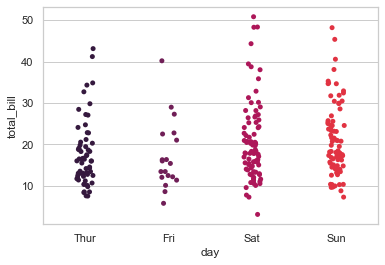

In [15]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

# Plotting basic Strip Plot by adding little noise with 'jitter' parameter:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

Looks quite familiar, right? Indeed it is! This is again a *scatterplot presentation* with one of it's variable as *Categorical*. From *Tips* dataset, we have chosen *Days* of a Week as our categorical variable against the *Total bill* generated in the restaurant for that particular *day*. Just like *Swarm plot*, even [Strip Plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) can be plotted on it's own but generally it is coupled with other plots like **Violin plot**, as discussed earlier, and we shall go through those kind of coupling as well later on in this lecture.

Important to note is that sometimes you might find professionals referring to **Strip plot** as **Dot Plot**, so that shouldn't actually confuse you as both refer to the same type of plot that we're looking at right now.

For now, let us quickly go through the *parameters* to find if there is something that requires extra attention, or better to say, something that we haven't covered as of now:

`seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None)`

Not that difficult to guess by now that `x`, `y` and `data` are our three mandatory parameters. Quick note here would be that you would often find me as well as other domain specific people abbreviating *parameters* as **params**, so I just thought of letting you know so that it doesn't ever confuse you. Moving on, rest of the *optional parameters* are similar to our Swarm plot and in the same order so nothing new out here for us to explore. 

Let us then add few more *optional params* to our previous code to check it's flexibility:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

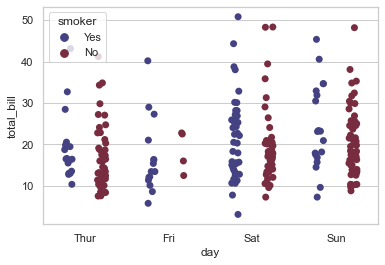

In [16]:
sns.stripplot(x="day", y="total_bill", hue="smoker", data=tips, jitter=True, palette="icefire", size= 7, dodge=True, lw=0.5)

There isn't much to explain here that we not aware of in terms of inference, though remember that if you need to plot these scattered points *horizontally*, all that you need to do is *interchange* `x` and `y` variable position. Let us slightly alter the aesthetics of our plot now:

In [17]:
# Loading Iris dataset for this experiment:
iris = sns.load_dataset("iris")

# Melt dataset to 'long-form' or 'tidy' representation:
iris = pd.melt(iris, "species", var_name="measurement")

<AxesSubplot:xlabel='measurement', ylabel='value'>

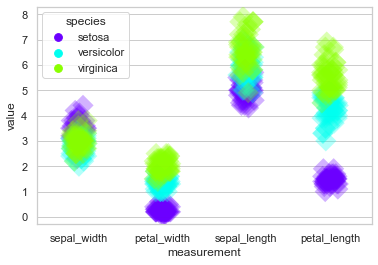

In [18]:
sns.stripplot(x="measurement", y="value", hue="species", order=['sepal_width','petal_width','sepal_length','petal_length'], 
              data=iris, palette="hsv_r", size=15, marker="D", alpha=.30)

Personally, I am not really a great fan of these kind of strips but I have often seen it's implication in FinTech so if work for a bank or any closely related domain, you can play around with this by increasing the *size* or transparency with `alpha`, etc. You even have the option to change marker. Let me quickly replace this plot with `+` sign marker:

<AxesSubplot:xlabel='measurement', ylabel='value'>

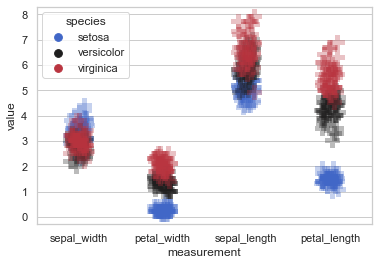

In [19]:
sns.stripplot(x="measurement", y="value", hue="species", order=['sepal_width','petal_width','sepal_length','petal_length'], 
              data=iris, palette="icefire", size=15, marker="P", alpha=.30)

This graphical data analysis technique for summarizing a univariate data set, pretty well suits the requirement to plot the sorted response values along one axis. So now let us try to enhance it even more by coupling with other plots.

Meanwhile, I would also like you to know that generally in real-world, **Strip Plot** acts as a replacement to **Histogram** or **Density Plot**; but again *Strip Plots* are much more efficient with *long-form data* and not so good with *wide-form data*. For wide-form dataset, histograms and Density plot that we discussed in our previous lecture are going to be a better choice. Also need to remember that there is no *thumb-rule* for choosing a type of plot for any dataset because as mentioned earlier, it majorly depends upon the dataset in-hand and associated requirements.

Just like we explored pairing of plots with Swarm plot, let us now try thise with Strip plot on our Tips dataset:

<AxesSubplot:xlabel='day', ylabel='tip'>

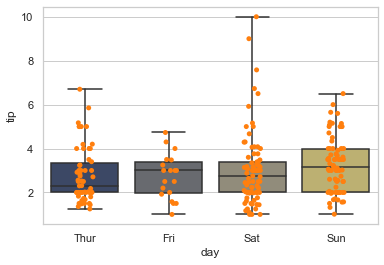

In [20]:
sns.boxplot(x="day", y="tip", data=tips, whis=np.inf, palette="cividis")
sns.stripplot(x="day", y="tip", data=tips, jitter=True, color=tableau_20[2])

We shall be discussing **Box plot** later in detail but for now, the *horizontal bar* at the top that you see is actually known as **whisker** and marks the extreme values for particular variable. Here, it marks the top **tip amount** given for **each day**. `np.inf` is a Python or say Cython attribute for getting float values. As always, `jitter` helps in adding *noise* to our dataset. Let us get a mix with Violin plot now. As stated earlier, such mixes get a broader visualization impact on insight extraction.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

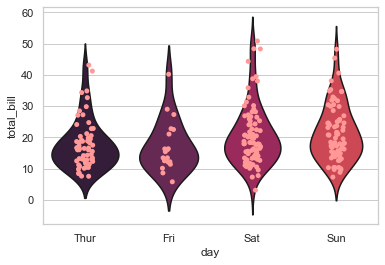

In [21]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, color=tableau_20[7])

**Violin plot** has few different *optional params* that we shall discuss in it's specific lecture, but for now I would just like you to focus on the **strip plot** that gets beautifully enclosed within a Violin plot. 

You must have noticed by now that everytime I am adding noise to the dataset with `jitter`, but not necessarily had been doing this earlier, so let me explain why I add this parameter. The reason is that *Strip plots* in general struggle to display multiple data points with the same value. And `jitter` adds that random noise to vertical axis to compensate.

OKAY! That pretty much gets us done with everything that Seaborn Strip plot in general has to offer so now it is time for me to share with you few *tips and tricks* of real-world business. 

For illustration purpose, I shall build a simple Pandas DataFrame with just 3 variables, *City*, *Gender* and *Age*. And then try to plot a **Strip plot** with just 2 data points, one for each *Gender*. Let's do this:

<AxesSubplot:xlabel='City', ylabel='Age'>

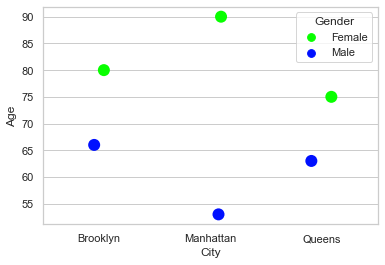

In [22]:
sample = [["Brooklyn", "Female", 80], ["Brooklyn", "Male", 66], ["Manhattan", "Female", 90], 
          ["Manhattan", "Male", 53], ["Queens", "Female", 75], ["Queens", "Male", 63]]

sample = pd.DataFrame(sample, columns=["City", "Gender", "Age"])

sns.stripplot(x="City", y="Age", hue="Gender", data=sample, palette="hsv", size=12, lw=1.5)

For this *sample* dataframe, we get our data points plotted but this plot doesn't give us too much of a feel, because obviously we do not have that many data points. This is a scenario you may come across, and then it is a better idea to have this plot modified a little to look good. And for that, let us add a *line* attaching both data points:

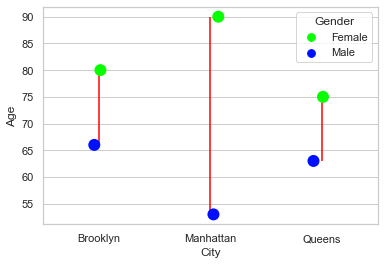

In [23]:
# Customization help from underlying Matplotlib:
from matplotlib import collections

# Copy-paste previous code:
sample = [["Brooklyn", "Female", 80], ["Brooklyn", "Male", 66], ["Manhattan", "Female", 90], 
          ["Manhattan", "Male", 53], ["Queens", "Female", 75], ["Queens", "Male", 63]]

sample = pd.DataFrame(sample, columns=["City", "Gender", "Age"])

ax = sns.stripplot(x="City", y="Age", hue="Gender", data=sample, palette="hsv", size=12, lw=1.5)

# Modifications - Creating a Line connecting both Data points:
lines = ([[x, i] for i in df] for x, (_, df) in enumerate(sample.groupby(["City"], sort=False)["Age"]))
mlc = collections.LineCollection(lines, colors='red', linewidths=1.5)    
ax.add_collection(mlc)

I believe that looks much better and shows relevance upto an extent. Well, this can be customized further by adding *markers*, etc. but I shall leave that as a homework for you.

Moving on, let us try to plot a Strip plot with Tips dataset once again. There is something I want to show you regarding Legends on the plot here:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

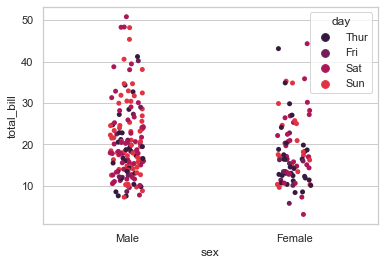

In [24]:
sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)

What if we want to *remove the legend* from our plot? Let's try that:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

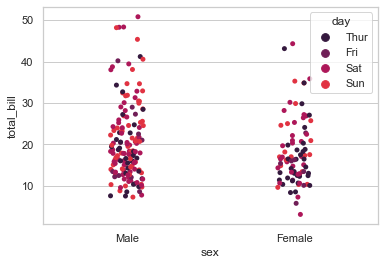

In [25]:
sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)

Do you notice the **"AttributeError"** at the end? Generally a simple addition of `legend=False` should get you rid of Legends but with **Strip Plot**, it doesn't work and people often struggle with it. So let me show you how simple it actually is to remove that legend:

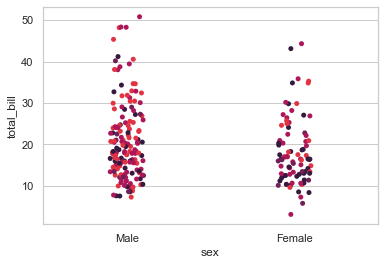

In [26]:
ax = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)

ax.legend_.remove()

And we successfully removed Legend from our plot. Okay! Now let me show you something that might be useful, if you into *Research domain* or trying to get into one such domain. What if we require *Mean*, *median*, *mode* from our plot. Let me show you **how to get median line** for a random dataset:

Every time we try to customize our plot, be it any of *Seaborn* plot, we shall be referencing underlying *Matplotlib*, just as we're going to do here for getting **horizontal lines for the median** points of our dataset. Let us try to get this done:

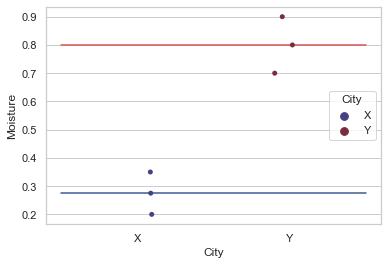

In [27]:
# Creating sample DataFrame:
sample = pd.DataFrame({"City": ["X", "X", "X", "Y", "Y", "Y"], "Moisture": [0.2, 0.275, 0.35, 0.7, 0.8, 0.9]})

# Calculating Median for both axes:
x_med = sample.loc[sample["City"] == 'X'].median()['Moisture']
y_med = sample.loc[sample["City"] == 'Y'].median()['Moisture']

sns.stripplot(x="City", y="Moisture", data=sample, hue="City", palette="icefire")

x = plt.gca().axes.get_xlim()

# how to plot median line?
plt.plot(x, len(x) * [x_med], sns.xkcd_rgb["denim blue"])
plt.plot(x, len(x) * [y_med], sns.xkcd_rgb["pale red"])

With all these variations that we've learnt, we now have a good idea to deal with **Strip Plot**, as & when required. In the next lecture, we shall be dealing with a plot that we've already observed umpteen number of times but this time, it would be a detailed discussion about it's scope, variations and few more real-world scenarios.

Till then, I would highly recommend to play around with these plots as much as you can and if you have any doubts, feel free to post in the forum. Also, it would be nice if you could take out a minute of your time to leave a review or at least rate this course using Course Dashboard; because that shall help other students gauge if this course is worth their time and money.

And, I shall meet you in the next lecture where we will discuss **Box Plot**. Till then, Happy Visualizing!